In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv(r'/Users/mrunalidhoble/Downloads/tvmarketing.csv')     

<Axes: xlabel='TV', ylabel='Sales'>

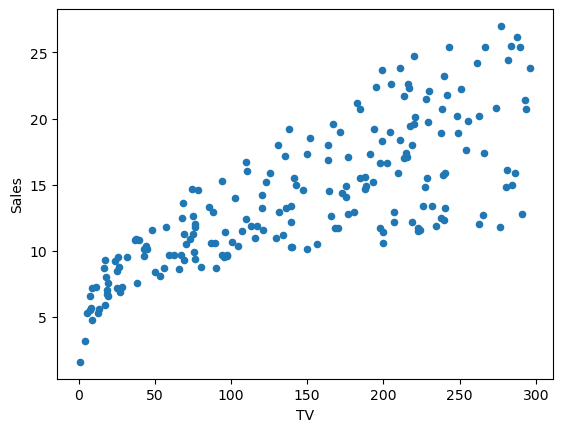

In [5]:
df.plot(x = 'TV' , y = 'Sales' , kind = 'scatter')

In [6]:
X = df['TV']
y = df['Sales']

In [7]:
from sklearn.model_selection import train_test_split
Xtrain , Xtest , ytrain , ytest = train_test_split(X, y , test_size = 0.2 , random_state = 0)

In [8]:
print(Xtrain.shape , ytrain.shape)
print(Xtest.shape , ytest.shape)

(160,) (160,)
(40,) (40,)


In [9]:
lr = LinearRegression()

In [10]:
Xtrain = np.expand_dims(Xtrain , 1)
Xtest = np.expand_dims(Xtest , 1)

In [11]:
print(Xtrain.shape)
print(Xtest.shape)

(160, 1)
(40, 1)


In [12]:
lr.fit(Xtrain , ytrain)

LinearRegression()

In [13]:
print(lr.intercept_)
print(lr.coef_)

7.292493773559366
[0.04600779]


In [14]:
lr.score(Xtrain , ytrain)

0.5884742462828709

In [15]:
lr.score(Xtest , ytest)

0.6763151577939721

In [16]:
y_pred = lr.predict(Xtest)

Text(0.5, 0, 'Sales')

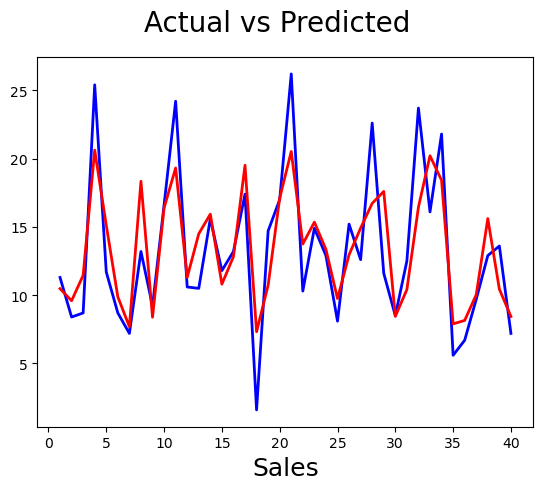

In [17]:
c = [i for i in range (1,41,1)]
fig = plt.figure()
plt.plot(c , ytest , color = "blue" , linewidth = 2 , linestyle = "-")
plt.plot(c , y_pred , color = "red" , linewidth = 2 , linestyle = "-")
fig.suptitle("Actual vs Predicted" , fontsize = 20)
plt.xlabel('Index' , fontsize = 18)
plt.xlabel('Sales' , fontsize = 18)

In [18]:
from sklearn.metrics import mean_squared_error , r2_score

mse = mean_squared_error(ytest , y_pred)
print(mse)

10.186181934530222


In [19]:
r2s = r2_score(ytest , y_pred)
print("r^2 score: ", r2s)

r^2 score:  0.6763151577939721


In [20]:
from sklearn.neural_network import MLPRegressor
mlp_r = MLPRegressor(hidden_layer_sizes = (5,) , activation = 'relu' , solver = 'sgd' , max_iter = 10)

In [21]:
mlp_r.fit(Xtrain , ytrain)

/Users/mrunalidhoble/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(5,), max_iter=10, solver='sgd')

In [22]:
ypred = mlp_r.predict(Xtest)

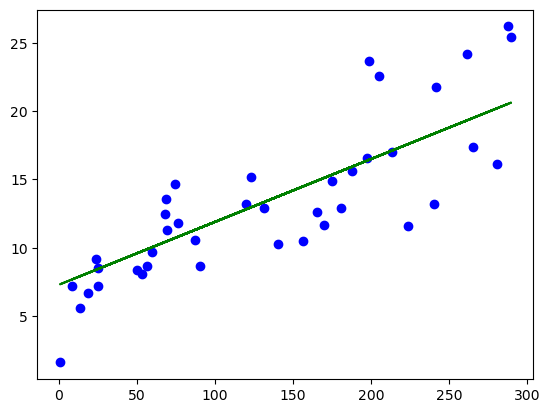

In [23]:
plt.scatter(Xtest , ytest , color = 'b')
plt.plot(Xtest , y_pred , color = 'g')